Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
!pip install missingno

Load Data

In [3]:
# Loading the csv file. 
df = pd.read_csv("../data/swiggy.csv")
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
# shape of the data.
rows, cols = df.shape
print("The dataset has {} rows and {} columns".format(rows,cols))

The dataset has 45593 rows and 20 columns


In [5]:
# datatypes of columns
(
    df.dtypes.rename("Data Types")
)

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
Name: Data Types, dtype: object

In [6]:
# info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [7]:
# Information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

**Corrections**

1. Age column should be numerical.
2. Ratings should be float.
3. Date and time columns should be date and time.
4. Vehicle conditions seems to be categorical column which is integer encoded.
5. Multiple deliveries should be integer column.
6. Target column should also be numbers.

In [8]:
# sample 50 rows of data for viewing. 

df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
33979,0x2e20,CHENRES13DEL01,23,4.5,13.027018,80.254791,13.037018,80.264791,07-03-2022,10:25:00,10:40:00,conditions Windy,Low,2,Meal,scooter,0,No,Metropolitian,(min) 12
18615,0x88f6,MUMRES14DEL01,35,4.5,19.181300,72.836191,19.291300,72.946191,06-04-2022,23:20:00,23:25:00,conditions Windy,Low,0,Drinks,motorcycle,1,No,Metropolitian,(min) 27
6426,0x304b,MUMRES010DEL01,37,4.3,19.003517,72.827650,19.113517,72.937650,29-03-2022,19:30:00,19:40:00,conditions Fog,Jam,1,Meal,scooter,2,No,Metropolitian,(min) 47
33052,0x3366,VADRES16DEL01,39,4.6,0.000000,0.000000,0.040000,0.040000,13-03-2022,16:40:00,16:45:00,conditions Sandstorms,Medium,2,Meal,scooter,1,No,Urban,(min) 30
32772,0x307a,MYSRES08DEL01,26,4.2,12.297954,76.665169,12.407954,76.775169,04-03-2022,18:55:00,19:00:00,conditions Fog,Medium,2,Buffet,motorcycle,1,No,Urban,(min) 31


In [9]:
# missing values in data

df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [10]:
df.isna().sum().sum()

0

In [11]:
# sample 50 rows of data for viewing

df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
45351,0xca45,DEHRES04DEL02,28,4.1,30.340722,78.060221,30.420722,78.140221,14-02-2022,21:15:00,21:25:00,conditions Cloudy,Jam,1,Buffet,motorcycle,1,No,Metropolitian,(min) 32
24215,0xc8ff,KOLRES15DEL02,34,4.9,22.552672,88.352885,22.632672,88.432885,12-02-2022,20:30:00,20:35:00,conditions Fog,Jam,1,Meal,motorcycle,3,Yes,Metropolitian,(min) 47
17222,0x149f,CHENRES07DEL01,34,4.8,13.081878,80.248519,13.121878,80.288519,24-03-2022,15:00:00,15:05:00,conditions Windy,High,1,Snack,motorcycle,1,No,Metropolitian,(min) 30
5543,0xbf0f,DEHRES19DEL01,NaN,NaN,-30.372202,-78.077151,30.382202,78.087151,13-02-2022,NaN,09:35:00,conditions Sandstorms,Low,1,Buffet,scooter,0,No,Metropolitian,(min) 11
11551,0xb85f,BANGRES18DEL02,21,5,12.913041,77.683237,12.933041,77.703237,03-04-2022,09:55:00,10:05:00,conditions Fog,Low,1,Buffet,motorcycle,0,No,Urban,(min) 13


In [12]:
'''
NaN values in the data

Investigate further
'''

'\nNaN values in the data\n\nInvestigate further\n'

Missing values

-- Missing values are string type in the data with an extra space.

In [13]:
df.loc[43317,"Delivery_person_Ratings"]

'NaN '

In [14]:
# String NaNs in the data

(df == "NaN ").sum().sum()

8515

8515 such NaN's in the data

In [15]:
# column wise string NaNs

(df == "NaN ").sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [16]:
# Verify missing values in the data

df.replace("NaN ",np.NaN).isna().sum().sum()

8515

Verified that string NaNs converted to Nan

In [17]:
# NaN in the weather column
(
    df.loc[:,"Weatherconditions"]
    .str.replace("conditions ","")
    .replace("NaN",np.NaN)
    .isna().sum()
)

616

616 missing values in the weather column

In [18]:
# # df with all the missing values replace. 
# df = df.replace("NaN ", np.NaN)

# # clean the 'Weatherconditions' column. 
# df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions',"")
# df['Weatherconditions'] = df['Weatherconditions'].replace("NaN", np.NaN)

# # save the cleaned DataFrame. 
# missing_df = df 
# missing_df

# df with all the missing values replace

missing_df = (
    df.replace("NaN ",np.NaN)
    .assign(
        Weatherconditions = lambda df_ : (
            df_['Weatherconditions']
            .str.replace("conditions ","")
            .replace("NaN",np.NaN)
            )
    )
)

missing_df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [19]:
missing_df['Weatherconditions'].head(50)

0          Sunny
1         Stormy
2     Sandstorms
3          Sunny
4         Cloudy
5         Cloudy
6            Fog
7         Cloudy
8         Stormy
9            Fog
10        Stormy
11    Sandstorms
12    Sandstorms
13           Fog
14    Sandstorms
15         Windy
16    Sandstorms
17        Cloudy
18         Windy
19    Sandstorms
20    Sandstorms
21    Sandstorms
22         Windy
23        Cloudy
24         Sunny
25        Stormy
26        Cloudy
27         Windy
28         Windy
29    Sandstorms
30        Stormy
31    Sandstorms
32        Cloudy
33        Stormy
34        Cloudy
35         Sunny
36         Windy
37    Sandstorms
38         Sunny
39        Stormy
40           Fog
41        Cloudy
42        Cloudy
43    Sandstorms
44        Stormy
45           Fog
46         Sunny
47         Windy
48        Cloudy
49         Sunny
Name: Weatherconditions, dtype: object

In [20]:
# missing values in the data. 

missing_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [21]:
# Total missing values in dataset. 

missing_df.isna().sum().sum()

9131

Missing Value Analysis

Matrix

<AxesSubplot: >

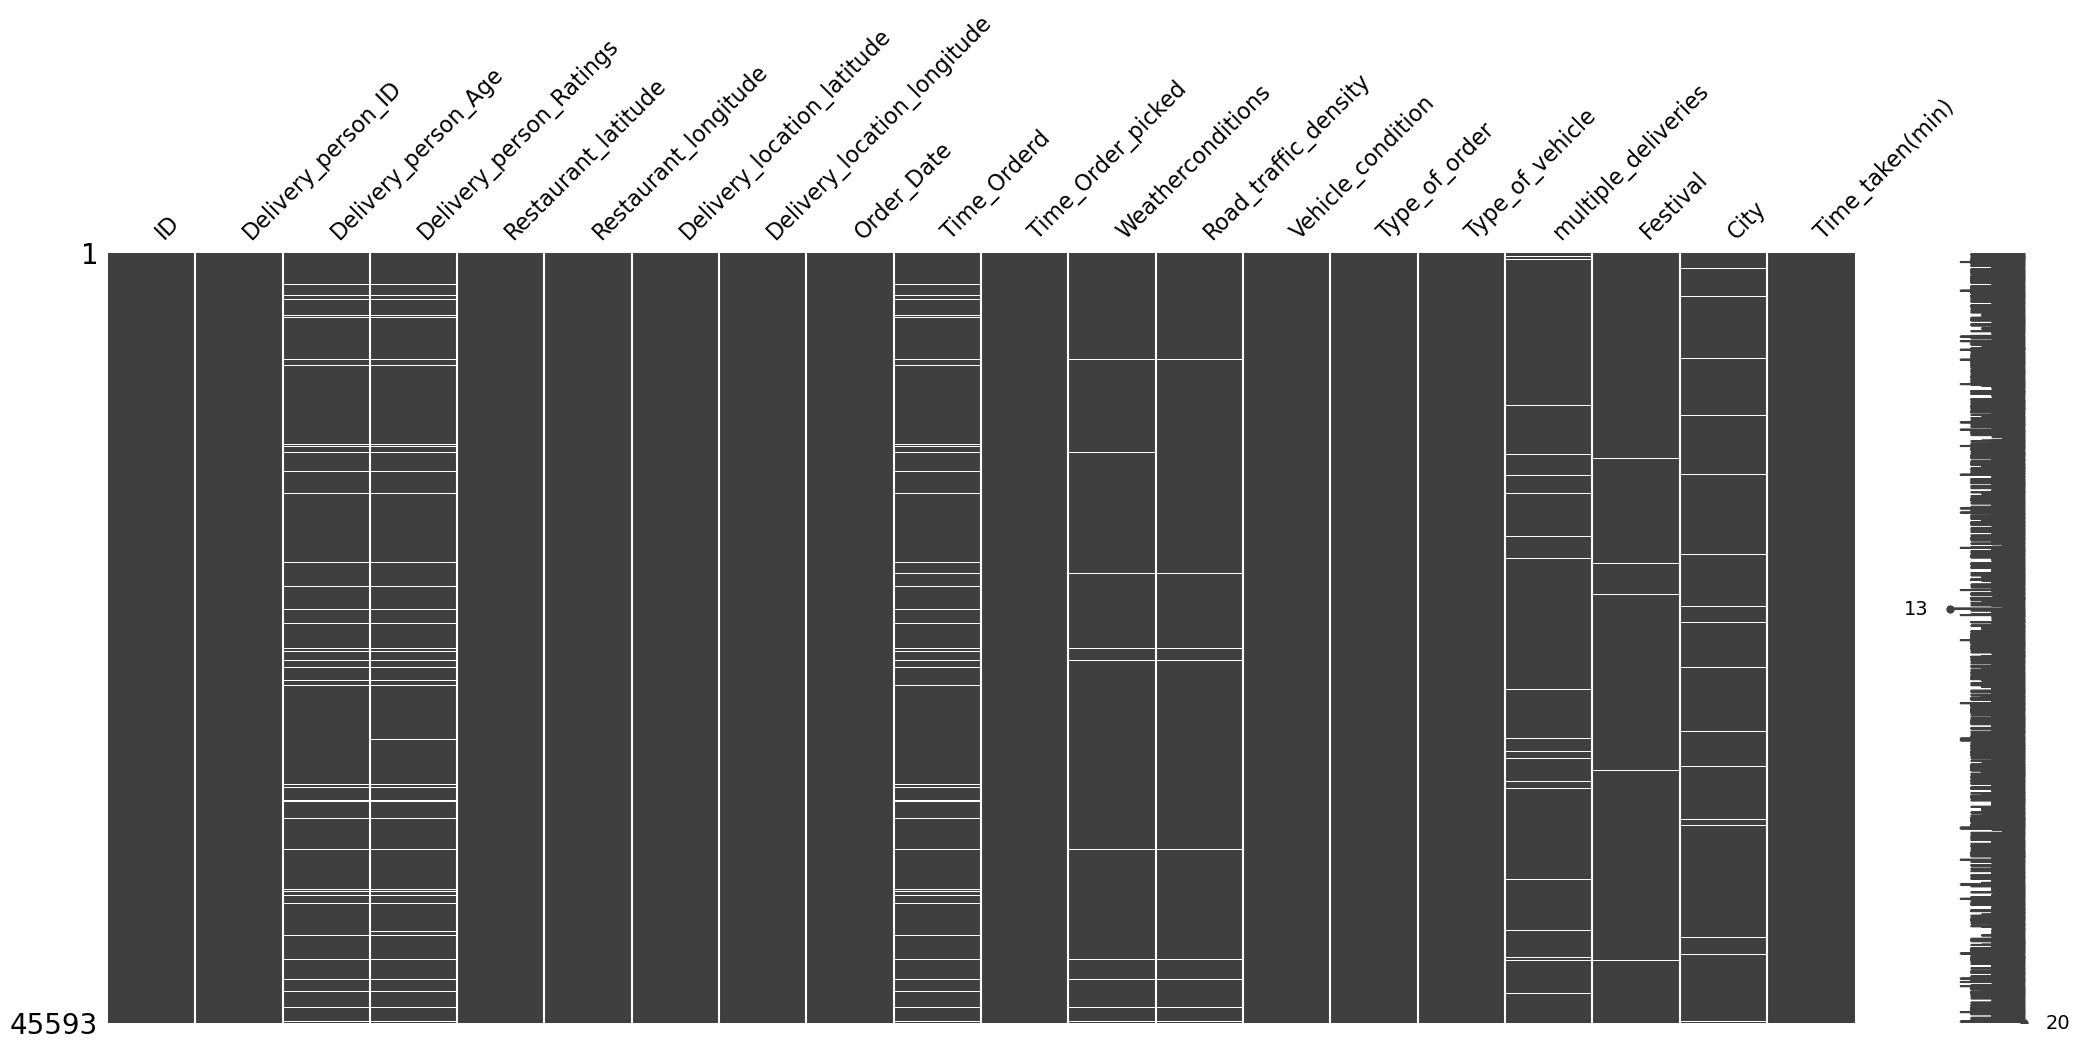

In [22]:
# missing values matrix. 

msno.matrix(missing_df)

Count of Missing Values

<AxesSubplot: >

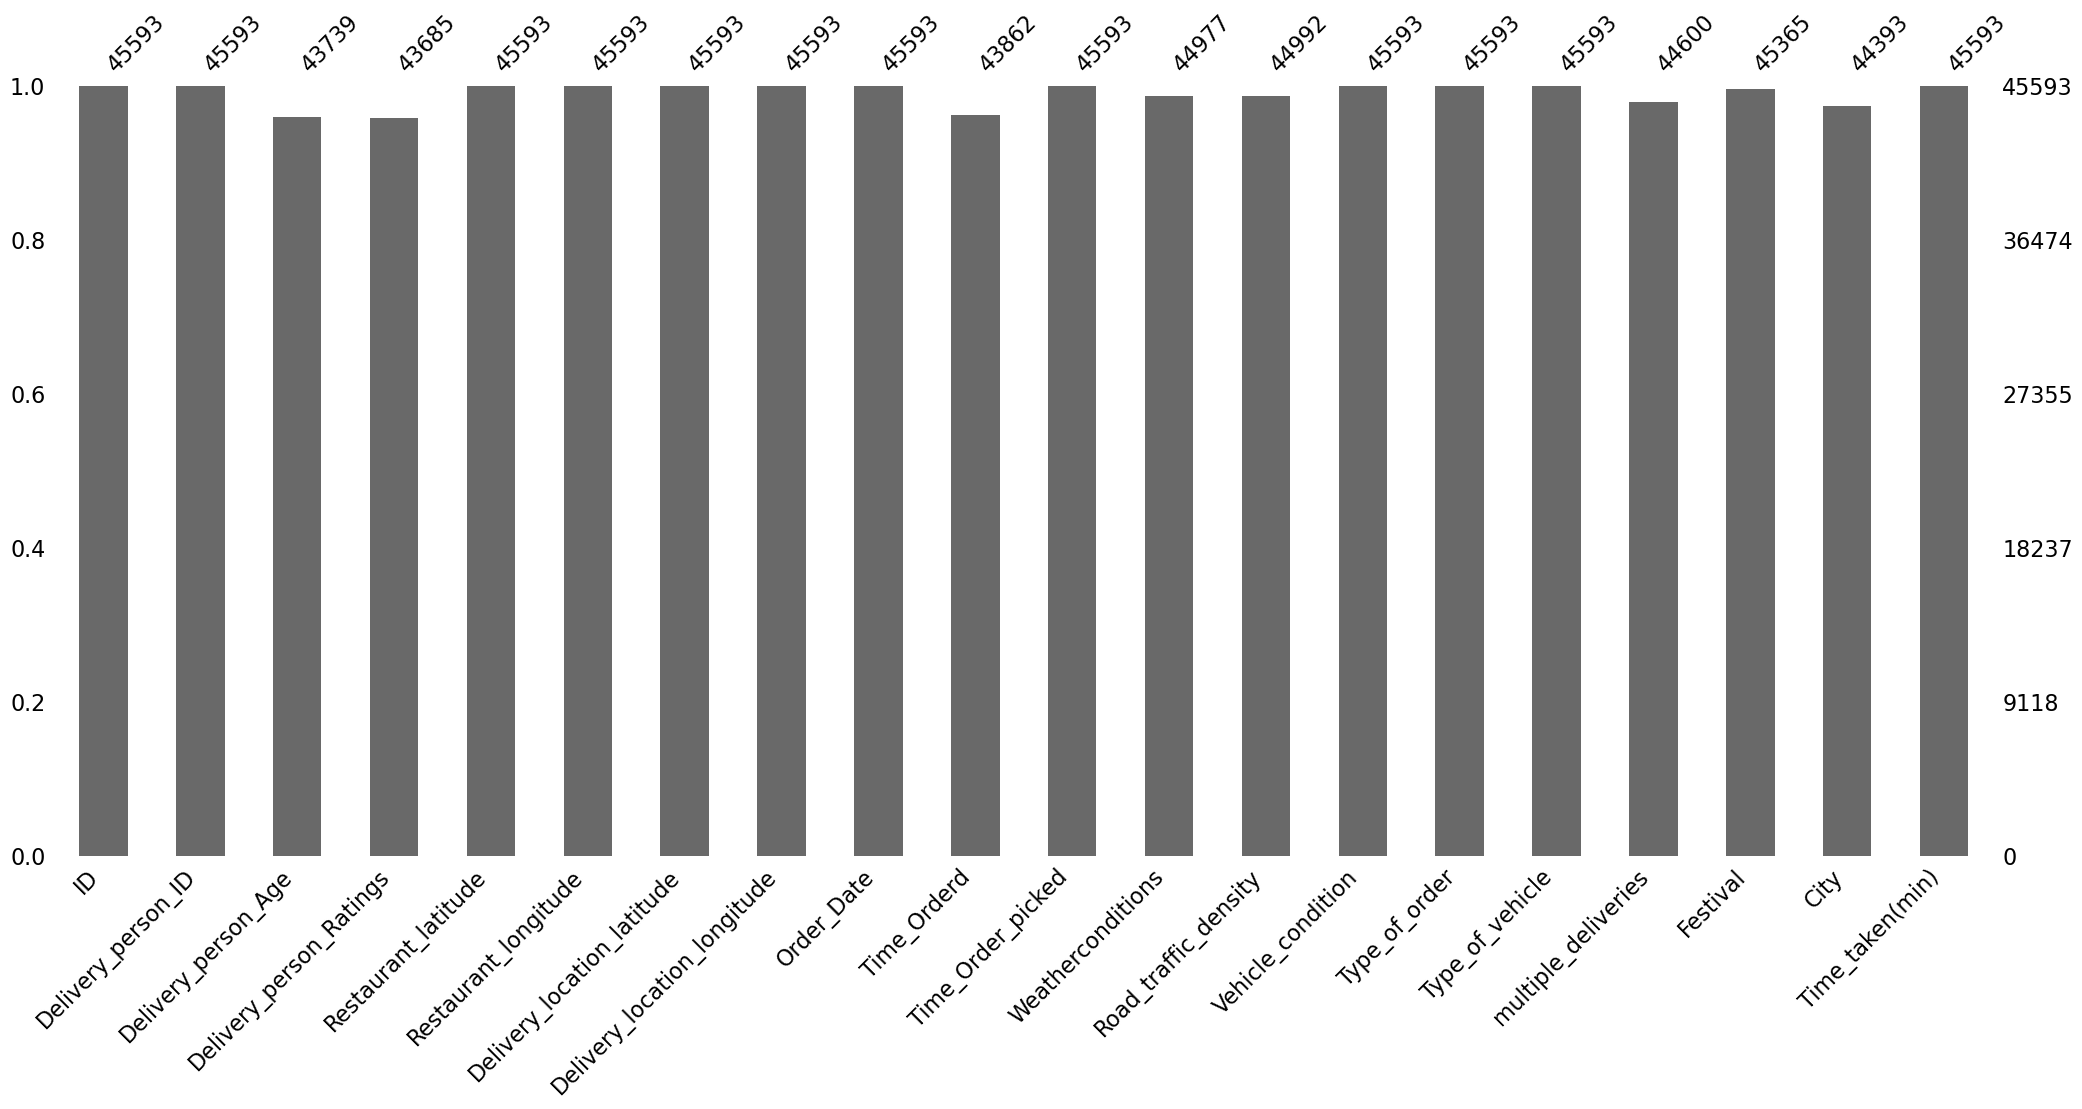

In [23]:
# Bar plot for columns having missing data. 

msno.bar(missing_df)

Missing Corr

<AxesSubplot: >

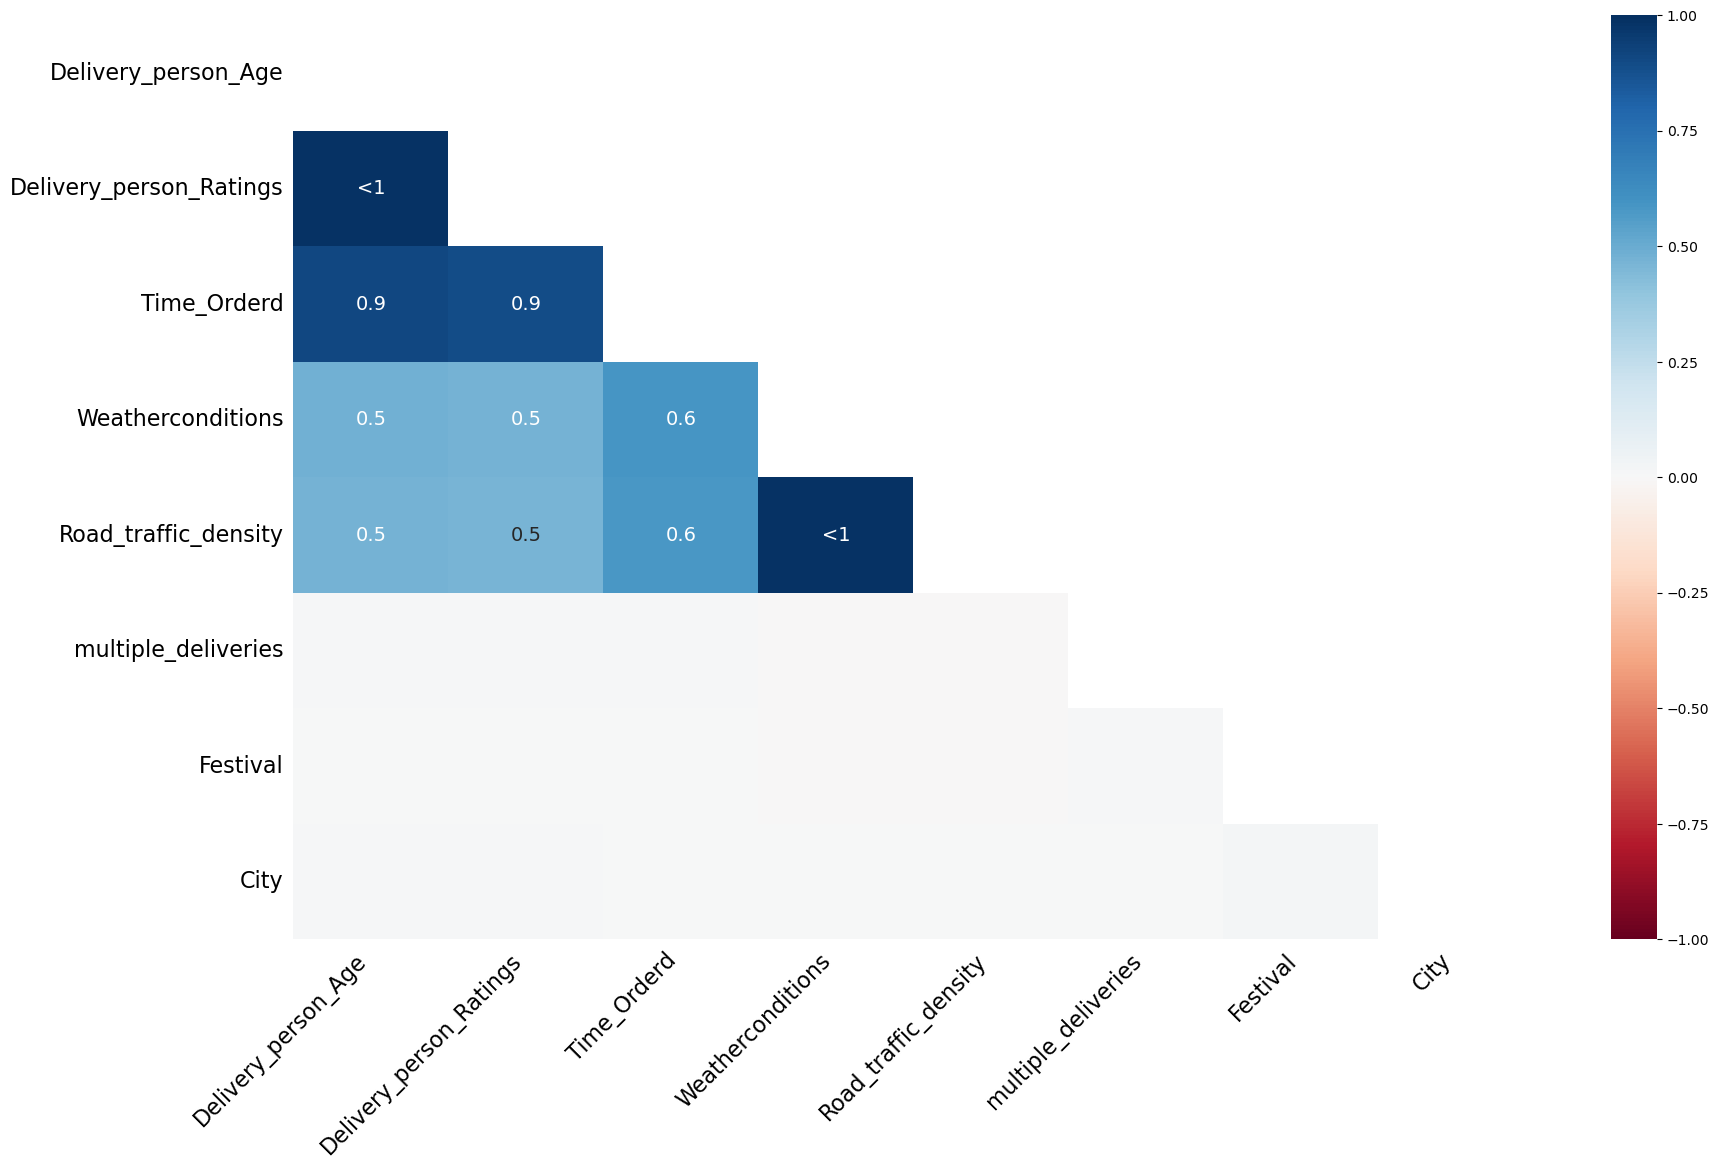

In [24]:
# missing data correlation

msno.heatmap(missing_df)

**Observations**

1. The delivery person columns are correlated to each other. This means that missingness in these columns is highly related which means lack of rider data.
2. The time ordered column is also related to the rider which shows that the data might be missing due to some network error where the system was unable to log rider details and time of order.
3. There is a very high correlation between weather patterns and the road traffic information. Be clear that this does not mean that the road traffic and weather columns are correlated. High corr in missingness means that if value in one column is missing, it is a high chance that it will be missing in others as well.
3. Road traffic density also shows correlation to the rider as it might be provided through the phone of rider (need to investigate).

In [25]:
missing_df[["Weatherconditions","Road_traffic_density"]].isna().sum()

Weatherconditions       616
Road_traffic_density    601
dtype: int64

In [26]:
# Prove point of missingness
(missing_df[["Weatherconditions","Road_traffic_density"]]
    .isna().all(axis=1)
    .sum() )/ missing_df[["Weatherconditions","Road_traffic_density"]].isna().sum()

Weatherconditions       0.975649
Road_traffic_density    1.000000
dtype: float64

In [27]:
# Calculating the percentage of missingness in two columns i.e.., Weatherconditions, & Road_traffic_density. 

(missing_df[["Weatherconditions","Road_traffic_density"]].isna().all(axis=1).sum()) / (missing_df[["Weatherconditions","Road_traffic_density"]].isna().sum())

Weatherconditions       0.975649
Road_traffic_density    1.000000
dtype: float64

Dendrogram

<AxesSubplot: >

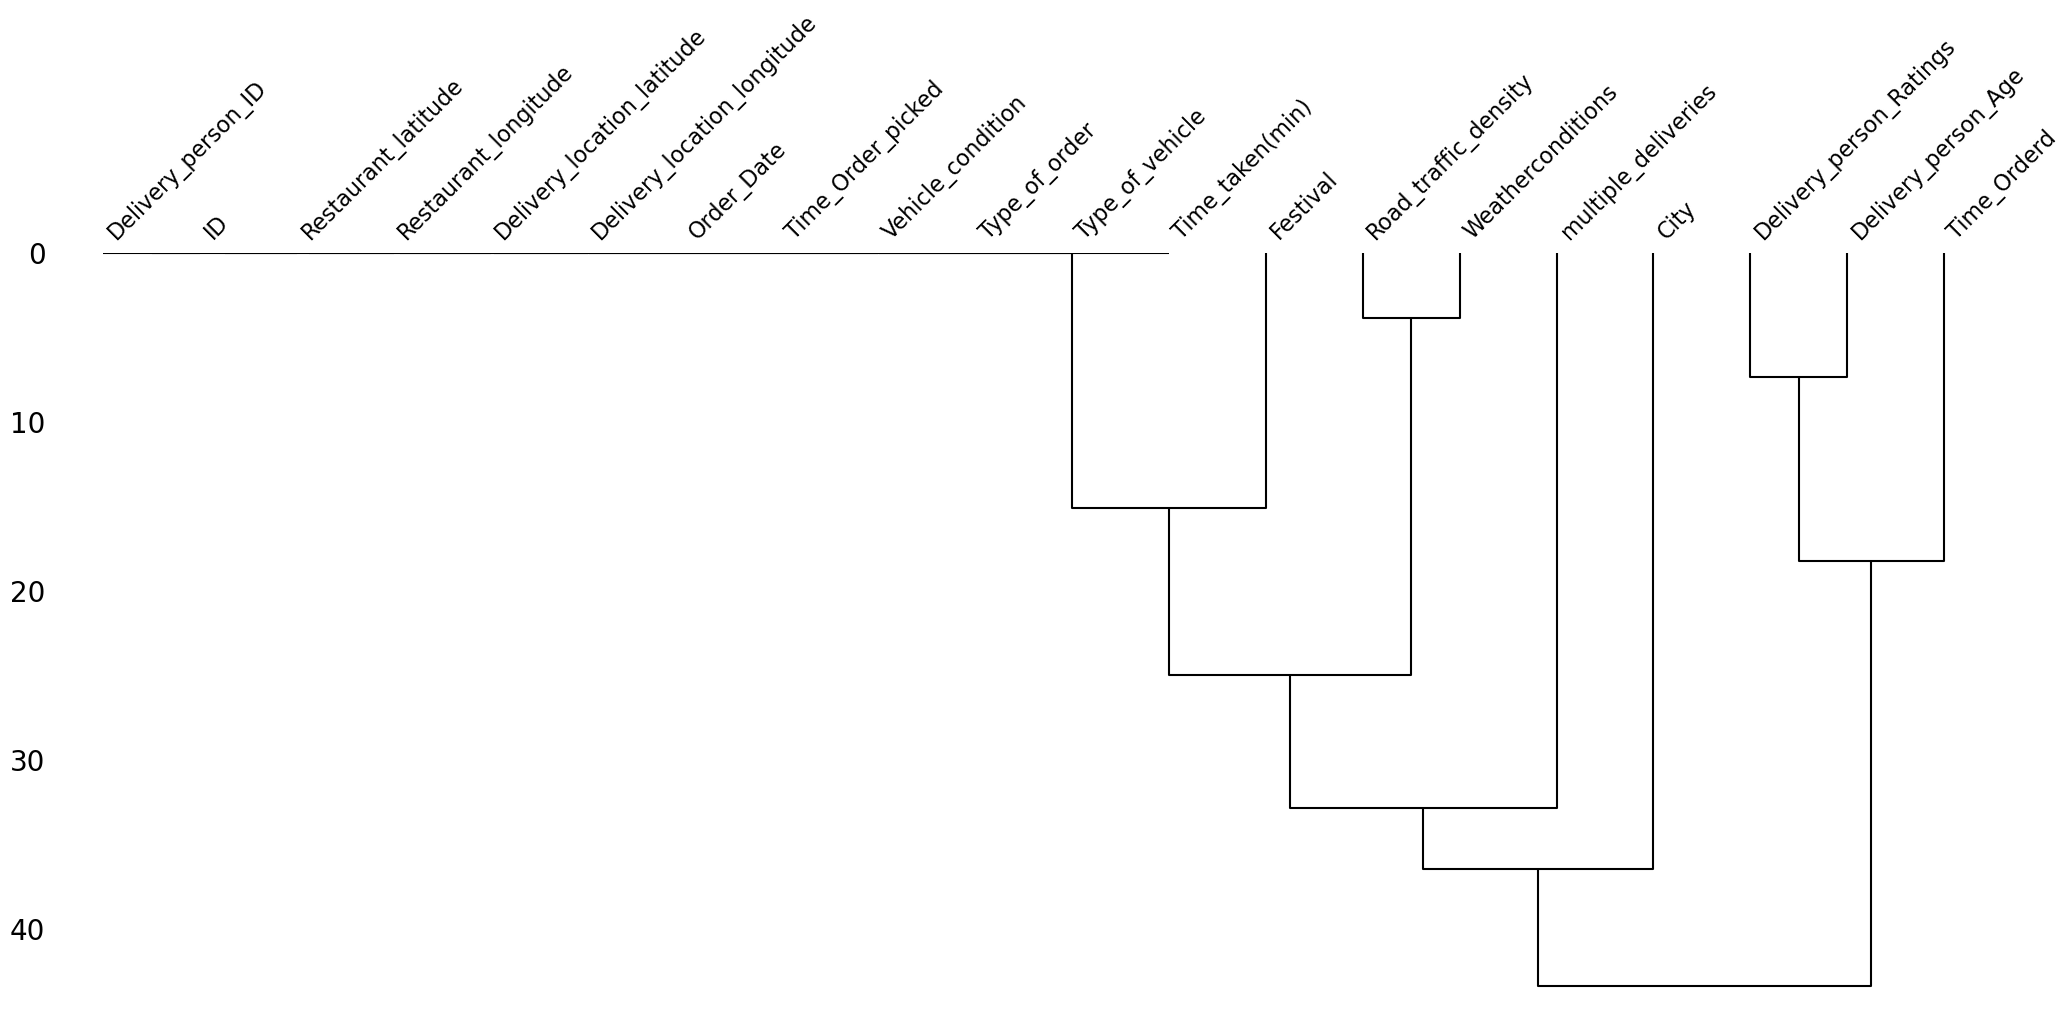

In [28]:
msno.dendrogram(missing_df)

In [29]:
# percentage of rows in the data having missing values. 

missing_percentage_of_rows = (missing_df.isna().any(axis=1).sum() / missing_df.shape[0])*100
print("The missing percentage of rows in the dataset: ", missing_percentage_of_rows, "%")

The missing percentage of rows in the dataset:  9.266773408198627 %


About 9% of the rows in the data have missing values

### Basic Data Cleaning

In [30]:
# columns names in the dataset. 

df.columns.tolist()

['ID',
 'Delivery_person_ID',
 'Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked',
 'Weatherconditions',
 'Road_traffic_density',
 'Vehicle_condition',
 'Type_of_order',
 'Type_of_vehicle',
 'multiple_deliveries',
 'Festival',
 'City',
 'Time_taken(min)']

In [31]:
# Changing the name of the columns in more readable format. 

def change_column_names(data: pd.DataFrame):
    
    # Convert all columns names to lowercase. 
    data = data.rename(columns=str.lower)

    # Renaming the specific columns. 
    new_col_names = {
        "delivery_person_id" : "rider_id",
        "delivery_person_age": "age",
        "delivery_person_ratings": "ratings",
        "delivery_location_latitude": "delivery_latitude",
        "delivery_location_longitude": "delivery_longitude",
        "time_orderd": "order_time",
        "time_order_picked": "order_picked_time",
        "weatherconditions": "weather",
        "road_traffic_density": "traffic",
        "city": "city_type",
        "time_taken(min)": "time_taken"
    }

    data = data.rename(columns=new_col_names)
    return data

# Change column names. 
df = change_column_names(df)

df.head(10)

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46


In [32]:
# Checking for the duplicates rows. 

df.drop(columns=['id', 'rider_id']).duplicated().sum()

0

There are no duplicates rows in the data. 

## **Column Wise Cleaning.**

#### **1. ID**

In [33]:
# Unique items in ID column. 

print(f"The number of unique IDs are {df['id'].nunique()}")

The number of unique IDs are 45593


All the ID values are unique

This column can be dropped from the data

#### **2. Rider Id**

In [34]:
# Unique rider ids in the column. 

df['rider_id'].nunique()

1320

The data contains 1320 unique riders

In [35]:
# rider order count in data

df['rider_id'].value_counts()

PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: rider_id, Length: 1320, dtype: int64

In [36]:
# Extracting the city name out of the rider. 
# df['City_Name'] = df['rider_id'].str.split("RES").str.get(0).rename("City_Name")
df['rider_id'].str.split("RES").str.get(0).rename("City_Name")

0          INDO
1          BANG
2          BANG
3         COIMB
4          CHEN
          ...  
45588       JAP
45589       AGR
45590      CHEN
45591     COIMB
45592    RANCHI
Name: City_Name, Length: 45593, dtype: object

#### **3. Age**

In [37]:
# DataTypes. 

df['age'].dtype

dtype('O')

In [38]:
# min, mean, & max values. 

df['age'].astype(float).describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: age, dtype: float64

Minimum Rider age of **15** is concerning

Investigate further what type of transport is he using?

<AxesSubplot: ylabel='age'>

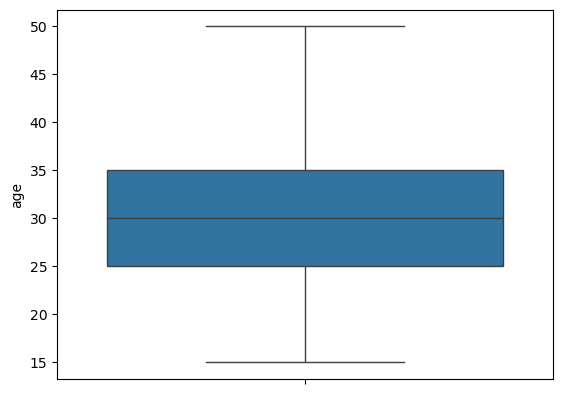

In [39]:
# Boxplot of the age column. 

sns.boxplot(df['age'].astype(float))

In [40]:
# Extracting the rows of the data where rider age is less than 18 (minor)

minors_data = df.loc[df['age'].astype('float') < 18]
minors_data

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
2387,0x564,JAPRES15DEL03,15,1,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,17:20:00,conditions NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15
2905,0xcd0,INDORES010DEL03,15,1,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,20:30:00,conditions NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29
2951,0x91a,SURRES17DEL03,15,1,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,22:10:00,conditions NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20
5902,0x474,CHENRES15DEL03,15,1,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,20:50:00,conditions NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25
9156,0x73f,BANGRES05DEL01,15,1,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,23:25:00,conditions NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34
10900,0x1b49,MUMRES14DEL02,15,1,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,20:55:00,conditions NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39
11125,0x40b,SURRES12DEL01,15,1,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,11:30:00,conditions NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27
12093,0x523,INDORES03DEL02,15,1,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,21:15:00,conditions NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28
15124,0x18b0,RANCHIRES02DEL01,15,1,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,23:55:00,conditions NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21
15927,0x550,CHENRES08DEL02,15,1,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,18:10:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17


In [41]:
minors_data.shape

(38, 20)

**Observations**:

1. The star ratings of all the riders is 1.
2. The vehicle condition of these riders is very bad.
3. No weather and traffic conditions available.
4. Age of all these riders is 15 which is below the permissable age to drive a vehicle.
5. Latitude and Longitude values in negative which is not possible. India is situated above the equator so all latitudes should be positive and east of meridian line so longitudes are positive as well.

**Seems like removing this data for now makes more sense then fixing it because a lot of data is missing**

In [42]:
# Rows of minors. 

minor_index = minors_data.index.tolist()
len(minor_index)

38

In [43]:
print(minor_index)

[2387, 2905, 2951, 5902, 9156, 10900, 11125, 12093, 15124, 15927, 16084, 16462, 21222, 22291, 23035, 23488, 23644, 23664, 25873, 26633, 26917, 27118, 27942, 28003, 29664, 31216, 31959, 33198, 34953, 36021, 37100, 37676, 39073, 39082, 40285, 41241, 44403, 44881]


#### **4. Ratings**

In [44]:
# DataType. 

df['ratings'].dtype

dtype('O')

In [45]:
# min, mean & max values. 

df['ratings'].astype(float).describe()

count    43685.000000
mean         4.633780
std          0.334716
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: ratings, dtype: float64

6 Star rating is possibly a data error

<AxesSubplot: ylabel='ratings'>

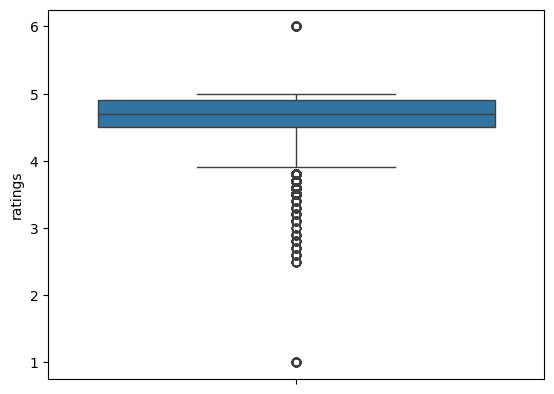

In [46]:
# Boxplot. 

sns.boxplot(df['ratings'].astype(float))

1. **The Minors data have ratings as 1 which seems like an anomaly if we generally consider the ratings column distribution.**

2. **The rating of 6 is also one another anomaly in the data as maximum ratings are 5 and not more than that**
    - Has to be investigated
    - If data is problematic than fixing or removing is an option

In [47]:
# Rows where the star rating is 6. 

six_star_data = df.loc[df['ratings'] == "6"]
len(six_star_data)

53

In [48]:
six_star_data.head()

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
3586,0x46d,BANGRES05DEL01,50,6,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30:00,conditions NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 25
4714,0x493,HYDRES17DEL01,50,6,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20:00,conditions NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 27
5169,0x4f2,JAPRES08DEL01,50,6,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20
5362,0x430,BANGRES19DEL01,50,6,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,20:55:00,conditions NaN,NaN,3,Meal,electric_scooter,1,No,Metropolitian,(min) 18
5651,0xbef1,AGRRES13DEL02,50,6,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20


In [49]:
six_star_index = six_star_data.index.tolist()
six_star_index

[3586,
 4714,
 5169,
 5362,
 5651,
 6394,
 7031,
 7681,
 9499,
 9535,
 10100,
 10737,
 12297,
 13257,
 13652,
 14106,
 14907,
 14944,
 16798,
 17145,
 17708,
 18977,
 19382,
 20269,
 21320,
 22416,
 23375,
 24237,
 24918,
 25285,
 26052,
 27221,
 27399,
 28315,
 28974,
 29535,
 30579,
 30943,
 31233,
 32326,
 33533,
 34688,
 38007,
 38020,
 38561,
 38649,
 39699,
 40223,
 41105,
 41969,
 42072,
 42835,
 45332]

**Investigate further before action**

Data removal seems logical at this stage.

#### **5. Location**

In [50]:
# Fetching the location latitude and longitude of restaurant and delivery. 
location_columns = df.columns[4:8].tolist()
location_columns

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [51]:
location_subset = df.loc[:, location_columns]
location_subset

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


Valid values for lat and long

India lies to the north of the equator between **6° 44′** and **35° 30′** north latitude and **68° 7′** and **97° 25′** east longitude.

In [52]:
# statistical Analysis. 

location_subset.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702
std,8.185109,22.883647,7.335122,21.118812
min,-30.905562,-88.366217,0.010000,0.010000
25%,12.933284,73.170000,12.988453,73.280000
50%,18.546947,75.898497,18.633934,76.002574
75%,22.728163,78.044095,22.785049,78.107044
max,30.914057,88.433452,31.054057,88.563452


In [53]:
# set the lower bound limits for the lat and long. 

lower_bound_lat = 6.44 
lower_bound_long = 68.70


In [54]:
# Filtering the rows where data latitude and longitude values are below the bounds. 

df.loc[
    (df['restaurant_latitude'] < lower_bound_lat) |
    (df['restaurant_longitude'] < lower_bound_long) |
    (df['delivery_latitude'] < lower_bound_lat) |
    (df['delivery_longitude'] < lower_bound_long)
].sample(5)

,id,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,order_time,order_picked_time,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken
40960,0xc004,BHPRES13DEL01,NaN,NaN,-23.230791,-77.43702,23.300791,77.50702,18-02-2022,NaN,00:05:00,conditions NaN,Low,1,Snack,motorcycle,0,No,Metropolitian,(min) 23
25195,0x7330,RANCHIRES14DEL03,36,4.2,0.000000,0.00000,0.090000,0.09000,06-03-2022,17:55:00,18:00:00,conditions Windy,Medium,2,Snack,scooter,0,No,Metropolitian,(min) 34
26252,0x4a6f,VADRES15DEL02,35,3.5,0.000000,0.00000,0.080000,0.08000,29-03-2022,19:30:00,19:40:00,conditions Windy,Jam,2,Buffet,scooter,1,No,Urban,(min) 34
1379,0xddb3,AURGRES16DEL01,32,4.8,0.000000,0.00000,0.040000,0.04000,15-02-2022,13:15:00,13:20:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,NaN,(min) 26
13204,0xcca5,DEHRES12DEL02,29,4.6,0.000000,0.00000,0.130000,0.13000,12-02-2022,22:20:00,22:30:00,conditions Windy,Low,0,Drinks,motorcycle,1,No,Urban,(min) 20


In [55]:
# Number of rows in data where lat long are erroneous. 

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].shape[0]

4071

There are 4071 rows in the data where the lat long columns are messy.

In [56]:
# statistical summary of problematic rows where lat long is below the country's geographical limits. 

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,-2.149416,2.068601,2.212538,8.299885
std,6.537913,25.270676,6.538283,23.980011
min,-30.905562,-88.366217,0.010000,0.010000
25%,0.000000,0.000000,0.040000,0.040000
50%,0.000000,0.000000,0.070000,0.070000
75%,0.000000,0.000000,0.110000,0.110000
max,0.000000,88.433452,31.045562,88.523452


(array([1, 2, 3, 4]),
 [Text(1, 0, 'restaurant_latitude'),
  Text(2, 0, 'restaurant_longitude'),
  Text(3, 0, 'delivery_latitude'),
  Text(4, 0, 'delivery_longitude')])

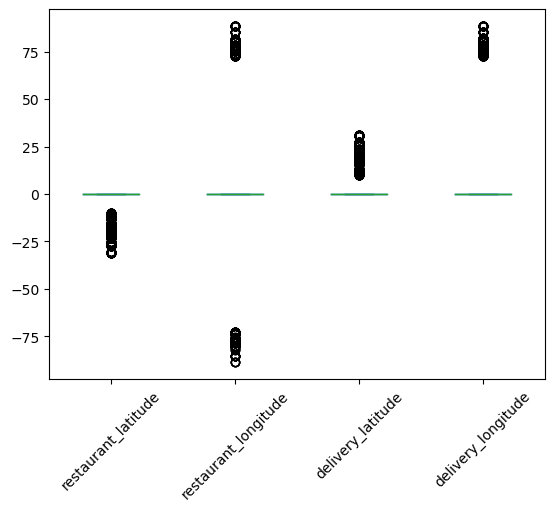

In [57]:
# Plotting the boxplot for all the anomalies. 

location_subset.loc[
    (location_subset['restaurant_latitude'] < lower_bound_lat) |
    (location_subset['restaurant_longitude'] < lower_bound_long) |
    (location_subset['delivery_latitude'] < lower_bound_lat) |
    (location_subset['delivery_longitude'] < lower_bound_long)
].plot(kind="box")

plt.xticks(rotation=45)

Negative Values are correct just we have to take absolute.

While calculating the distances we can assign null values to these erroneous data points and then impute the values using advanced imputation techniques.

[Text(1, 0, 'restaurant_latitude'),
 Text(2, 0, 'restaurant_longitude'),
 Text(3, 0, 'delivery_latitude'),
 Text(4, 0, 'delivery_longitude')]

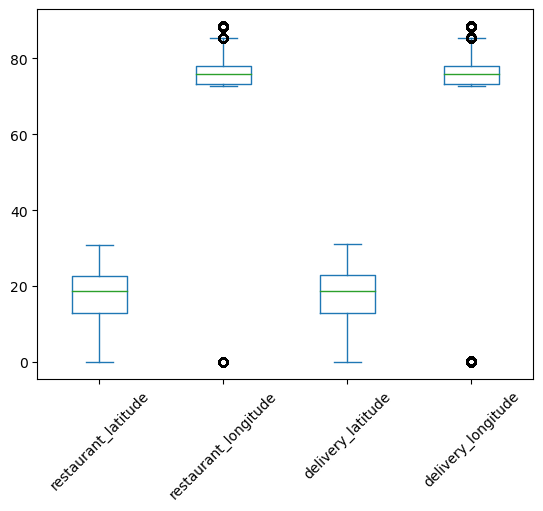

In [58]:
# Taking the absolute values. 
location_subset.abs().plot(kind="box")

ax = plt.gca() # Get the current axes (the plot area).

ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [59]:
# Number of rows after taking absolute values. 

abs_data = location_subset.abs()

filtered_data = abs_data[
    (abs_data['restaurant_latitude'] < lower_bound_lat) |
    (abs_data['restaurant_longitude'] < lower_bound_long) |
    (abs_data['delivery_latitude'] < lower_bound_lat) |
    (abs_data['delivery_longitude'] < lower_bound_long)
]

num_rows = filtered_data.shape[0]
print(num_rows)

3640


**3640** rows in the data that have messy lat long values.

In [60]:
# Extracting the lat long values which is less than 1. 

location_subset.abs().loc[lambda df_:
    (df_['restaurant_latitude'] < 1) |
    (df_['restaurant_longitude'] < 1) |
    (df_['delivery_latitude'] < 1) |
    (df_['delivery_longitude'] < 1)
]

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


All the messy lat long values are less than 1

In [61]:
def clean_lat_long(data: pd.DataFrame, threshold=1):
    
    # Get the list of location-related column names. 
    location_columns = location_subset.columns.tolist()

    # For each location column, replace values below threshold with NaN. 
    for col in location_columns:
        data[col] = np.where(data[col] < threshold, np.NaN, data[col])

    return data

clean_lat_long_col_values = clean_lat_long(df)
clean_lat_long_col_values.isna().sum()

id                         0
rider_id                   0
age                        0
ratings                    0
restaurant_latitude     4071
restaurant_longitude    3802
delivery_latitude       3640
delivery_longitude      3640
order_date                 0
order_time                 0
order_picked_time          0
weather                    0
traffic                    0
vehicle_condition          0
type_of_order              0
type_of_vehicle            0
multiple_deliveries        0
festival                   0
city_type                  0
time_taken                 0
dtype: int64

#### **6. Order Date**

In [62]:
# Check for missing values. 

df['order_date'].isna().sum()

0

In [63]:
# Unique values in order date.

df['order_date'].unique()

array(['19-03-2022', '25-03-2022', '05-04-2022', '26-03-2022',
       '11-03-2022', '04-03-2022', '14-03-2022', '20-03-2022',
       '12-02-2022', '13-02-2022', '14-02-2022', '02-04-2022',
       '01-03-2022', '16-03-2022', '15-02-2022', '10-03-2022',
       '27-03-2022', '12-03-2022', '01-04-2022', '05-03-2022',
       '11-02-2022', '08-03-2022', '03-04-2022', '30-03-2022',
       '28-03-2022', '18-03-2022', '06-04-2022', '04-04-2022',
       '24-03-2022', '09-03-2022', '02-03-2022', '13-03-2022',
       '29-03-2022', '31-03-2022', '17-03-2022', '07-03-2022',
       '15-03-2022', '16-02-2022', '03-03-2022', '18-02-2022',
       '23-03-2022', '17-02-2022', '06-03-2022', '21-03-2022'],
      dtype=object)

In [64]:
# date range. 

order_date = pd.to_datetime(df['order_date'], dayfirst=True)
order_date.max() - order_date.min()

Timedelta('54 days 00:00:00')

In [65]:
# min and max dates.
order_date.agg(['min', 'max']).set_axis(["start", "end"],axis=0)

start   2022-02-11
end     2022-04-06
Name: order_date, dtype: datetime64[ns]

In [66]:
# Extract day, day name, month and year. 
def extract_datetime_features(date_col):

    # Convert the input series to datetime format. 
    date_col = pd.to_datetime(date_col, dayfirst=True)

    # Create a DataFrame with extracted features.
    result = pd.DataFrame()
    result["day"] = date_col.dt.day
    result["month"] = date_col.dt.month
    result["year"] = date_col.dt.year
    result["day_of_week"] = date_col.dt.day_name()
    result["is_weekend"] = date_col.dt.day_name().isin(["Saturday", "Sunday"]).astype(int)

    return result

extract_datetime_features(df['order_date'])

,day,month,year,day_of_week,is_weekend
0,19,3,2022,Saturday,1
1,25,3,2022,Friday,0
2,19,3,2022,Saturday,1
3,5,4,2022,Tuesday,0
4,26,3,2022,Saturday,1
...,...,...,...,...,...
45588,24,3,2022,Thursday,0
45589,16,2,2022,Wednesday,0
45590,11,3,2022,Friday,0
45591,7,3,2022,Monday,0


#### **7. Order time and Order picked time**

In [67]:
# Extra hour information from data.

order_time_hr = pd.to_datetime(df.replace("NaN ",np.NaN)['order_time']).dt.hour
# pd.to_datetime(df.replace("NaN ",np.NaN)['order_time']).dt.hour
order_time_hr

0        11.0
1        19.0
2         8.0
3        18.0
4        13.0
         ... 
45588    11.0
45589    19.0
45590    23.0
45591    13.0
45592    17.0
Name: order_time, Length: 45593, dtype: float64

In [68]:
def time_of_day(ser):
    time_col = pd.to_datetime(ser).dt.hour

    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                            (ser.between(12,17,inclusive='left')),
                            (ser.between(17,20,inclusive='left')),
                            (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

time_subset = df.loc[:,["order_time","order_picked_time"]]
time_subset

,order_time,order_picked_time
0,11:30:00,11:45:00
1,19:45:00,19:50:00
2,08:30:00,08:45:00
3,18:00:00,18:10:00
4,13:30:00,13:45:00
...,...,...
45588,11:35:00,11:45:00
45589,19:55:00,20:10:00
45590,23:50:00,00:05:00
45591,13:35:00,13:40:00


In [69]:
time_subset.dtypes

order_time           object
order_picked_time    object
dtype: object

In [70]:
time_subset.columns.tolist()

['order_time', 'order_picked_time']

In [71]:
# calculate the pickup time

(
    time_subset
    .assign(**{
        col: pd.to_datetime(time_subset[col].replace("NaN ",np.NaN).dropna())
        for col in time_subset.columns.tolist()}
    )
    .assign(
        pickup_time = lambda x: (x['order_picked_time'] - x['order_time']).dt.seconds / 60,
        order_time_hour = lambda x: x['order_time'].dt.hour,
        order_time_of_day = lambda x: x['order_time_hour'].pipe(time_of_day)
    )
    .drop(columns=["order_time","order_picked_time"])
)

,pickup_time,order_time_hour,order_time_of_day
0,15.0,11.0,morning
1,5.0,19.0,evening
2,15.0,8.0,morning
3,10.0,18.0,evening
4,15.0,13.0,afternoon
...,...,...,...
45588,10.0,11.0,morning
45589,15.0,19.0,evening
45590,15.0,23.0,night
45591,5.0,13.0,afternoon


#### **8. Weather**

In [72]:
# value counts. 
df['weather'].value_counts()

conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: weather, dtype: int64

In [73]:
# unique values. 
df['weather'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [74]:
# Remove conditions from values. 

df['weather'].str.replace('conditions', '').unique()

array([' Sunny', ' Stormy', ' Sandstorms', ' Cloudy', ' Fog', ' Windy',
       ' NaN'], dtype=object)

#### **9. Traffic**

In [75]:
# Value counts. 

df['traffic'].value_counts()

Low        15477
Jam        14143
Medium     10947
High        4425
NaN          601
Name: traffic, dtype: int64

In [76]:
# unique values. 
df['traffic'].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', 'NaN '], dtype=object)

In [77]:
# 
df['traffic'].replace('NaN', np.NaN).str.rstrip().str.lower().unique()

array(['high', 'jam', 'low', 'medium', 'nan'], dtype=object)

#### **10. Vechicle Condition**

In [78]:
# Unique values in column. 

np.sort(df['vehicle_condition'].unique())

array([0, 1, 2, 3])

#### **11. Type of Order**

In [79]:
# value counts.
df['type_of_order'].value_counts()

Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: type_of_order, dtype: int64

In [80]:
# Unique values. 
df['type_of_order'].unique()

array(['Snack ', 'Drinks ', 'Buffet ', 'Meal '], dtype=object)

In [81]:
# 
df['type_of_order'].str.rstrip().str.lower().unique()

array(['snack', 'drinks', 'buffet', 'meal'], dtype=object)

#### **12. Type of Vechicle.**

In [82]:
# Value counts. 

df['type_of_vehicle'].value_counts()

motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: type_of_vehicle, dtype: int64

In [83]:
# Unique values. 
df['type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [84]:
# 
(
    df['type_of_vehicle']
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
      dtype=object)

#### **13. Multiple Deliveries**

In [85]:
# datatype of multiple deliveries column

df['multiple_deliveries'].dtype

dtype('O')

In [86]:
# unique values in column

df['multiple_deliveries'].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

In [87]:
# make the column as integer

(
    df['multiple_deliveries']
    .replace("NaN ",np.NaN)
    .astype(float)
    .unique()
)

array([ 0.,  1.,  3., nan,  2.])

#### **14. Festival**

In [88]:
# Unique values in column

df['festival'].unique()

array(['No ', 'Yes ', 'NaN '], dtype=object)

In [89]:
(
    df['festival']
    .replace("NaN ",np.NaN)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['no', 'yes', nan], dtype=object)

#### **15. City type**

In [90]:
# unique values in city type

df['city_type'].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', 'NaN '], dtype=object)

In [91]:
(
    df['city_type']
    .replace("NaN ",np.NaN)
    .str.rstrip()
    .str.lower()
    .unique()
)

array(['urban', 'metropolitian', 'semi-urban', nan], dtype=object)

#### **15. Time Taken**

In [92]:
# datatype of time taken

df['time_taken'].dtype

dtype('O')

In [93]:
df['time_taken'] = df['time_taken'].str.replace(r"\(min\)\s*", "", regex=True).astype(int)

In [94]:
df['time_taken']

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: time_taken, Length: 45593, dtype: int64

### **Perform Cleaning and Feature Building**

In [95]:
df.columns

Index(['id', 'rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'order_time', 'order_picked_time', 'weather', 'traffic',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city_type', 'time_taken'],
      dtype='object')

In [118]:
def time_of_day(ser):
    time_col = pd.to_datetime(ser).dt.hour

    return(
        np.select(condlist=[(ser.between(6,12,inclusive='left')),
                            (ser.between(12,17,inclusive='left')),
                            (ser.between(17,20,inclusive='left')),
                            (ser.between(20,24,inclusive='left'))],
                  choicelist=["morning","afternoon","evening","night"],
                  default="after_midnight")
    )

In [ ]:
# Building an function to clean the data. 
def data_cleaning(data: pd.DataFrame):

    # Drop unncessary columns and rows. 
    data = data.drop(columns='id')
    data = data.drop(index=minor_index)
    data = data.drop(index=six_star_index)
    
    # Replace "NaN" string with actual np.NaN
    data = data.replace("NaN ", np.NaN)
    
    # Extract City name from rider_id 
    data['city_name'] =  data['rider_id'].astype(str).str.split("RES").str[0]

    # Convert to appropriate types. 
    data["age"] = data["age"].astype(float)
    data["ratings"] = data["ratings"].astype(float)
    data["multiple_deliveries"] = data["multiple_deliveries"].astype(float)

    # Absolute values for coordinates. 
    data["restaurant_latitude"] = data["restaurant_latitude"].abs()
    data["restaurant_longitude"] = data["restaurant_longitude"].abs()
    data["delivery_latitude"] = data["delivery_latitude"].abs()
    data["delivery_longitude"] = data["delivery_longitude"].abs()

    # Convert order date to datetime and extract features
    data["order_date"] = pd.to_datetime(data["order_date"], dayfirst=True)
    data["order_day"] = data["order_date"].dt.day
    data["order_month"] = data["order_date"].dt.month
    data["order_day_of_week"] = data["order_date"].dt.day_name().str.lower()
    data["is_weekend"] = data["order_date"].dt.day_name().isin(["Saturday", "Sunday"]).astype(int)

    # Convert time columns to datetime
    data["order_time"] = pd.to_datetime(data["order_time"])
    data["order_picked_time"] = pd.to_datetime(data["order_picked_time"])

    # Calculate pickup time in minutes
    data["pickup_time_minutes"] = (data["order_picked_time"] - data["order_time"]).dt.total_seconds() / 60

    # Extract hour and time of day. 
    data["order_time_hour"] = data["order_time"].dt.hour
    # data["order_time_of_delay"] = data["order_time_hour"].apply(time_of_day)
    data["order_time_of_delay"] = time_of_day(data["order_time_hour"])

    # Clean categorical columns
    data["weather"] = data["weather"].astype(str).str.replace("conditions ", "", regex=False).str.lower().replace("nan", np.NaN)
    data["traffic"] = data["traffic"].astype(str).str.rstrip().str.lower()
    data["type_of_order"] = data["type_of_order"].astype(str).str.rstrip().str.lower()
    data["type_of_vehicle"] = data["type_of_vehicle"].astype(str).str.rstrip().str.lower()
    data["festival"] = data["festival"].astype(str).str.rstrip().str.lower()
    data["city_type"] = data["city_type"].astype(str).str.rstrip().str.lower()

    # Clean target column
    data['time_taken'] = data['time_taken'].astype(str).str.replace(r"\(min\)\s*", "", regex=True).astype(int)

    # Drop original time columns after extracting what we need.
    data = data.drop(columns=["order_time", "order_picked_time"])
    
    return data

data_cleaning(df)

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_type,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_delay
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,urban,24,INDO,19,3,saturday,1,15.0,11.0,morning
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,metropolitian,33,BANG,25,3,friday,0,5.0,19.0,evening
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,urban,26,BANG,19,3,saturday,1,15.0,8.0,morning
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,metropolitian,21,COIMB,5,4,tuesday,0,10.0,18.0,evening
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,metropolitian,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,metropolitian,32,JAP,24,3,thursday,0,10.0,11.0,morning
45589,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,metropolitian,36,AGR,16,2,wednesday,0,15.0,19.0,evening
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,metropolitian,16,CHEN,11,3,friday,0,-1425.0,23.0,night
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,metropolitian,26,COIMB,7,3,monday,0,5.0,13.0,afternoon


In [131]:
location_subset.columns.tolist()

['restaurant_latitude',
 'restaurant_longitude',
 'delivery_latitude',
 'delivery_longitude']

In [132]:
def calculate_haversine_distance(df):
    location_columns = location_subset.columns.tolist()
    lat1 = df[location_columns[0]]
    lon1 = df[location_columns[1]]
    lat2 = df[location_columns[2]]
    lon2 = df[location_columns[3]]

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(
        dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    distance = 6371 * c

    return (
        df.assign(
            distance = distance)
    )

In [133]:
# add more data cleaning steps

cleaned_data = (
                df.pipe(data_cleaning)
                .pipe(clean_lat_long)
                .pipe(calculate_haversine_distance)
                )

cleaned_data

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_delay,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846
45589,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45590,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,16,CHEN,11,3,friday,0,-1425.0,23.0,night,4.657195
45591,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393


#### **Validate Data Cleaning**

In [135]:
# age column. 

cleaned_data["age"].agg(["min", "max"])

min    20.0
max    39.0
Name: age, dtype: float64

In [136]:
# ratings column

cleaned_data['ratings'].agg(["min","max"])

min    2.5
max    5.0
Name: ratings, dtype: float64

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude
count,41473.000000,41737.000000,41872.000000,41872.000000
mean,18.898979,76.920513,18.977356,76.985325
std,5.460570,3.503334,5.469056,3.503260
min,9.957144,72.768726,9.967144,72.778726
25%,12.986047,73.897902,13.065996,73.940327
50%,19.065838,76.618203,19.124049,76.662620
75%,22.751234,78.368855,22.820040,78.405467
max,30.914057,88.433452,31.054057,88.563452


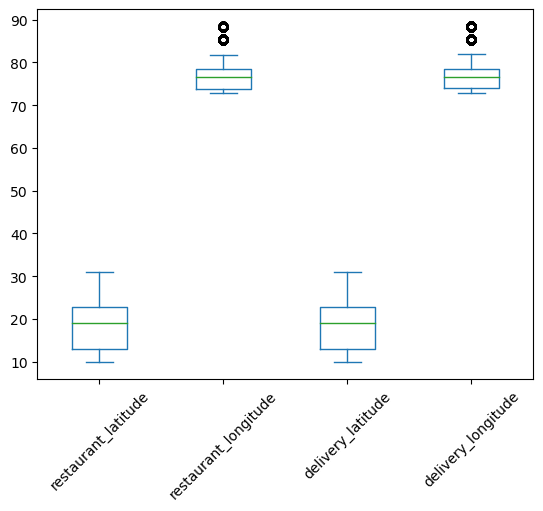

In [137]:
# location columns

cleaned_data[location_columns].plot(kind="box")

plt.xticks(rotation=45)

display(cleaned_data[location_columns].describe())

In [138]:
# Values in categorical columns. 

cat_cols = cleaned_data.select_dtypes(include="object").columns.tolist()

for col in cat_cols:
    print(f"For {col} unique values are: {cleaned_data[col].unique()}", end="\n\n")

For rider_id unique values are: ['INDORES13DEL02 ' 'BANGRES18DEL02 ' 'BANGRES19DEL01 ' ...
 'KOCRES04DEL01 ' 'BHPRES06DEL03 ' 'GOARES03DEL03 ']

For weather unique values are: ['sunny' 'stormy' 'sandstorms' 'cloudy' 'fog' 'windy' nan]

For traffic unique values are: ['high' 'jam' 'low' 'medium' 'nan']

For type_of_order unique values are: ['snack' 'drinks' 'buffet' 'meal']

For type_of_vehicle unique values are: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']

For festival unique values are: ['no' 'yes' 'nan']

For city_type unique values are: ['urban' 'metropolitian' 'semi-urban' 'nan']

For city_name unique values are: ['INDO' 'BANG' 'COIMB' 'CHEN' 'HYD' 'RANCHI' 'MYS' 'DEH' 'KOC' 'PUNE'
 'LUDH' 'KNP' 'MUM' 'KOL' 'JAP' 'SUR' 'GOA' 'AURG' 'AGR' 'VAD' 'ALH' 'BHP']

For order_day_of_week unique values are: ['saturday' 'friday' 'tuesday' 'monday' 'sunday' 'wednesday' 'thursday']

For order_time_of_delay unique values are: ['morning' 'evening' 'afternoon' 'night' 'after_midnight']



<AxesSubplot: >

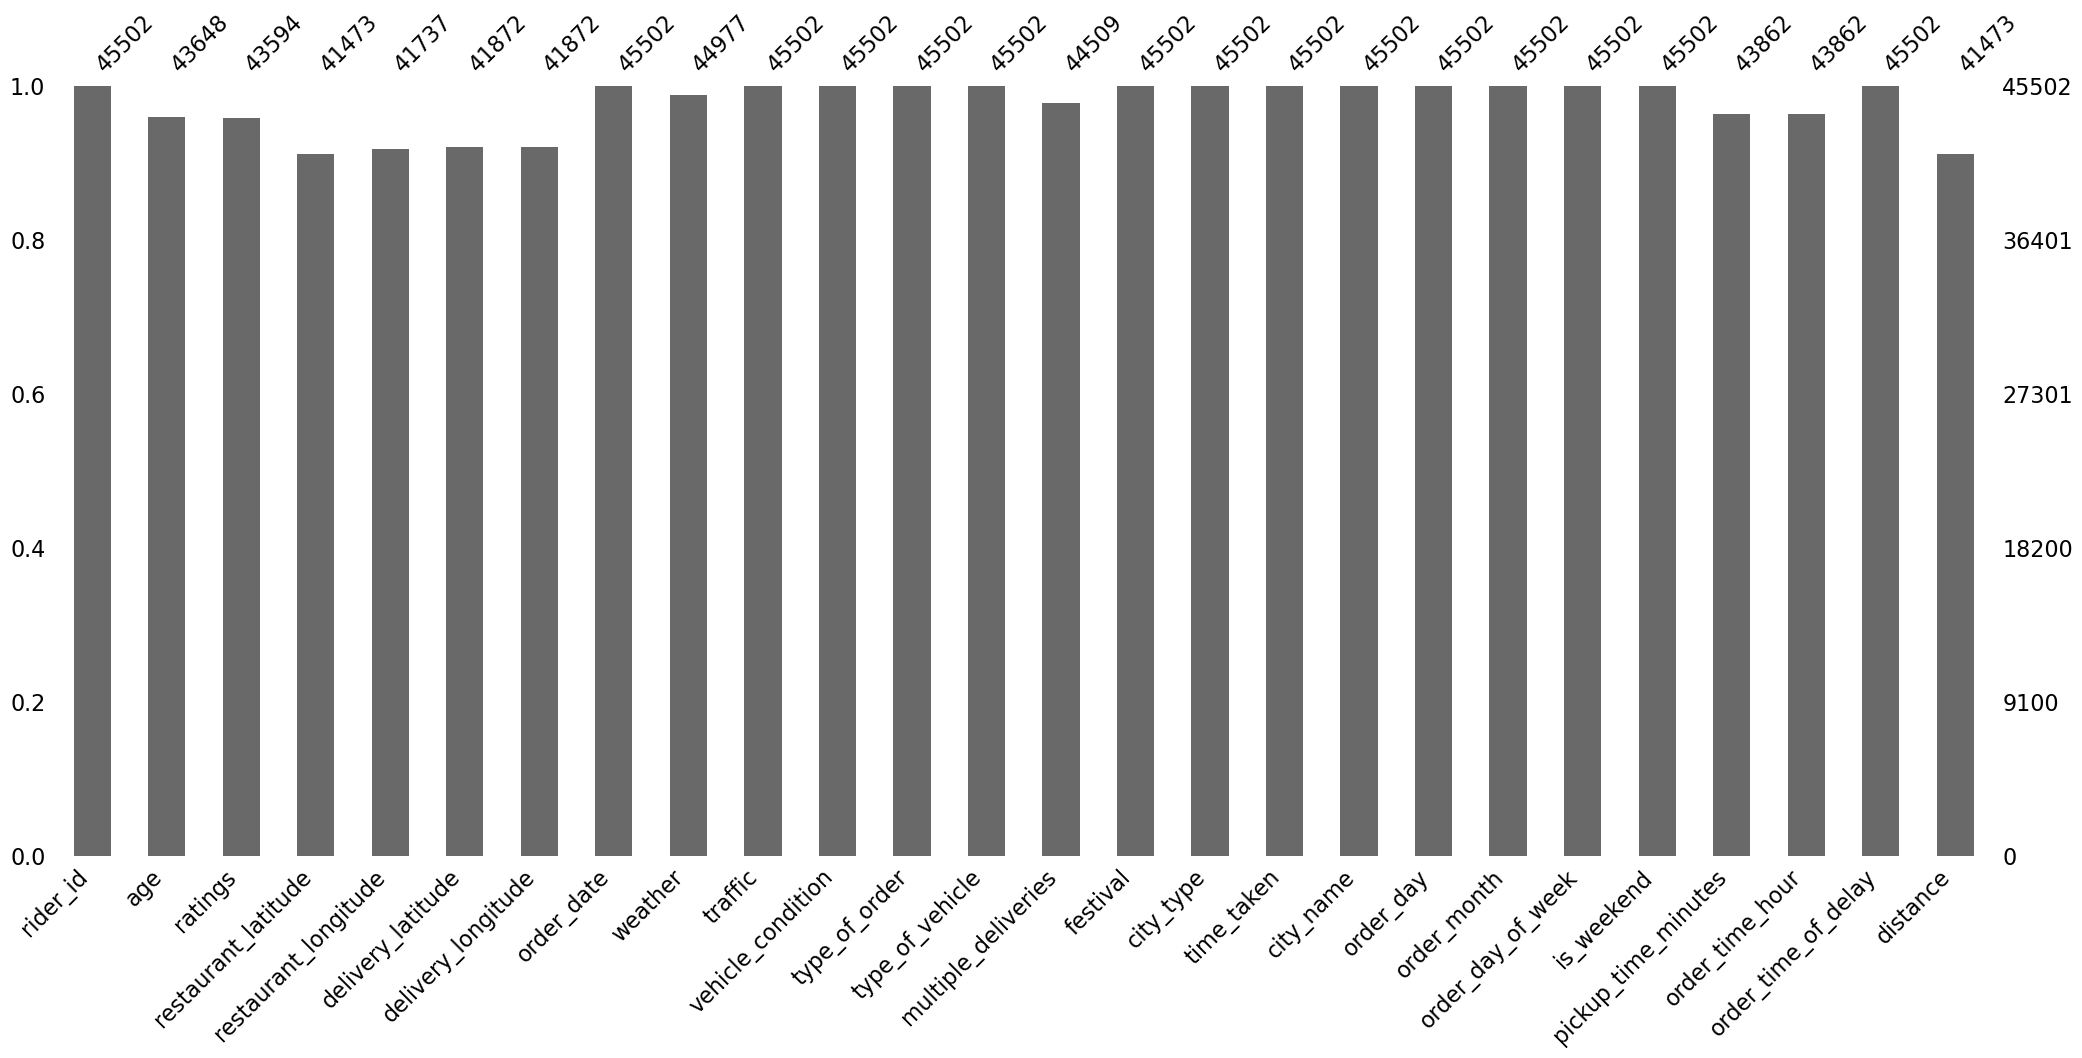

In [139]:
# Bar plot of missing values. 

msno.bar(cleaned_data)

<AxesSubplot: >

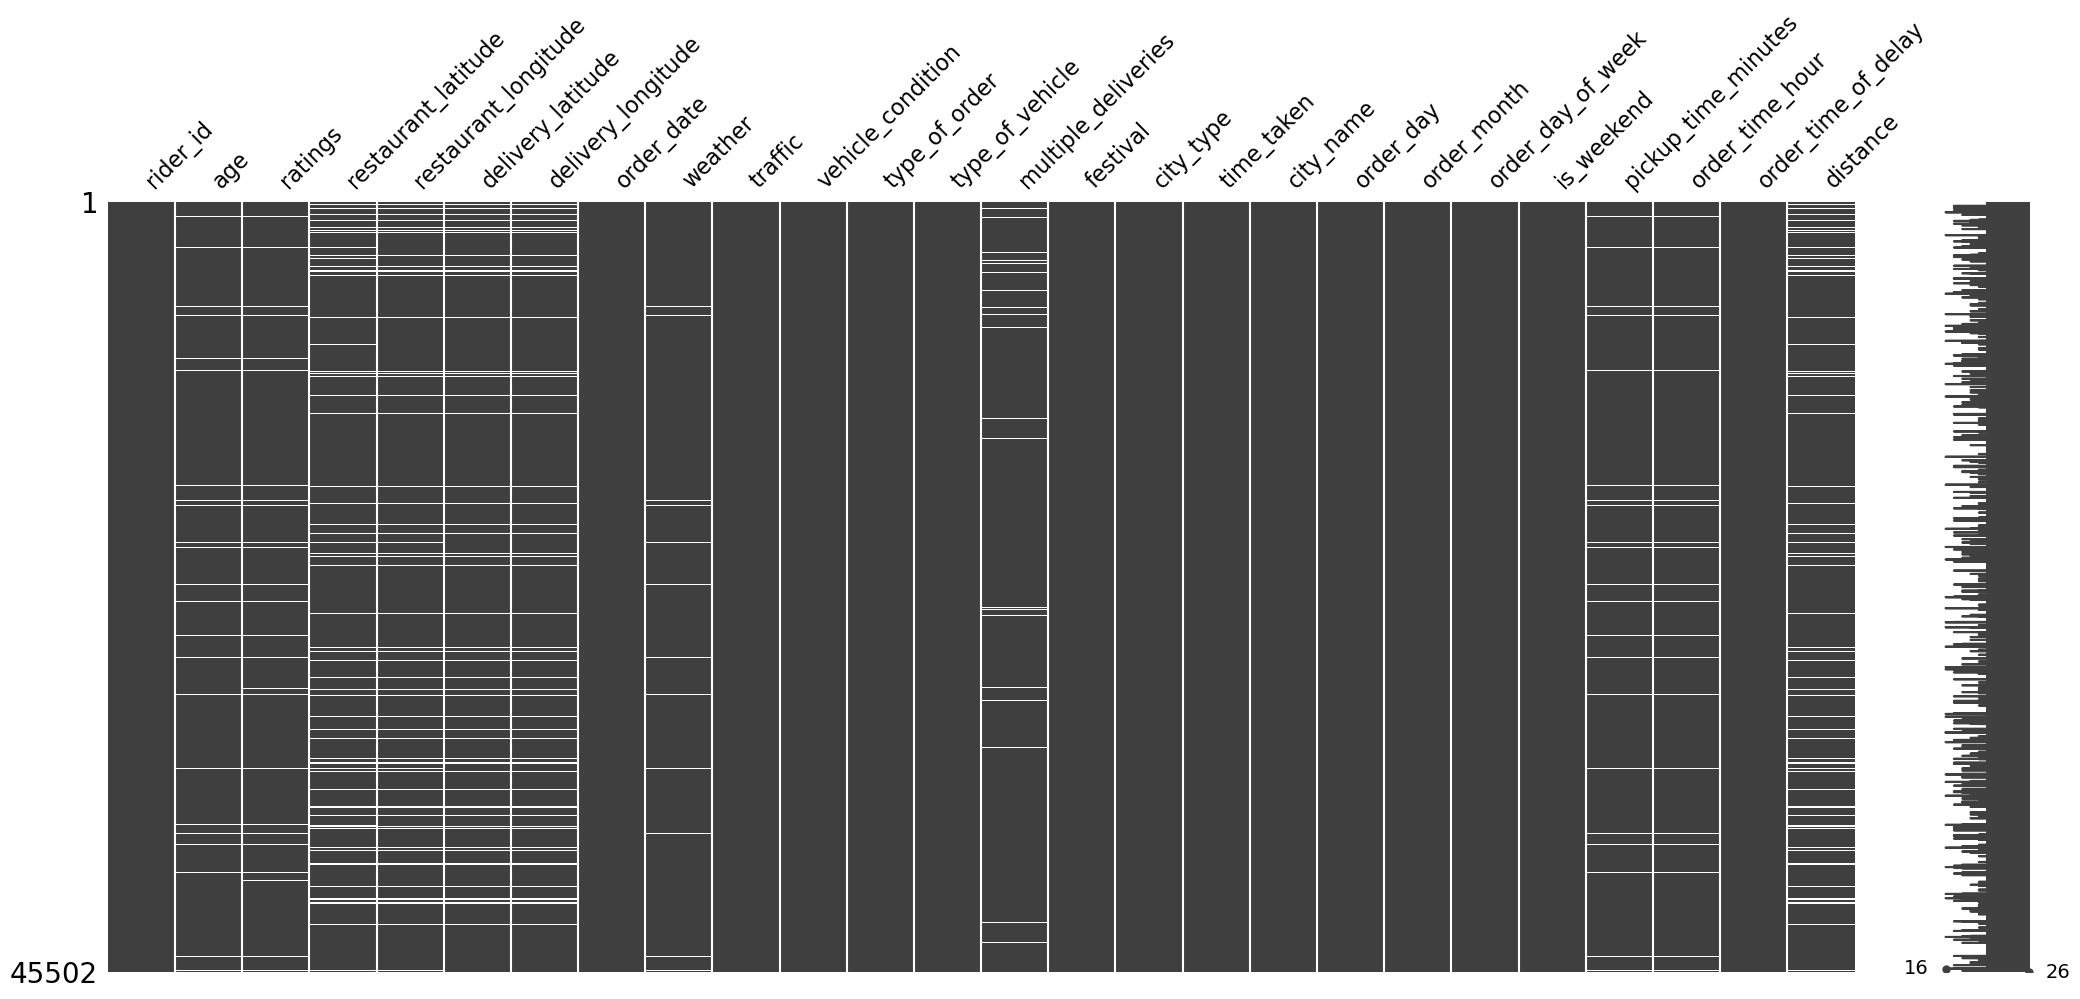

In [140]:
# matrix of missing values. 

msno.matrix(cleaned_data)

<AxesSubplot: >

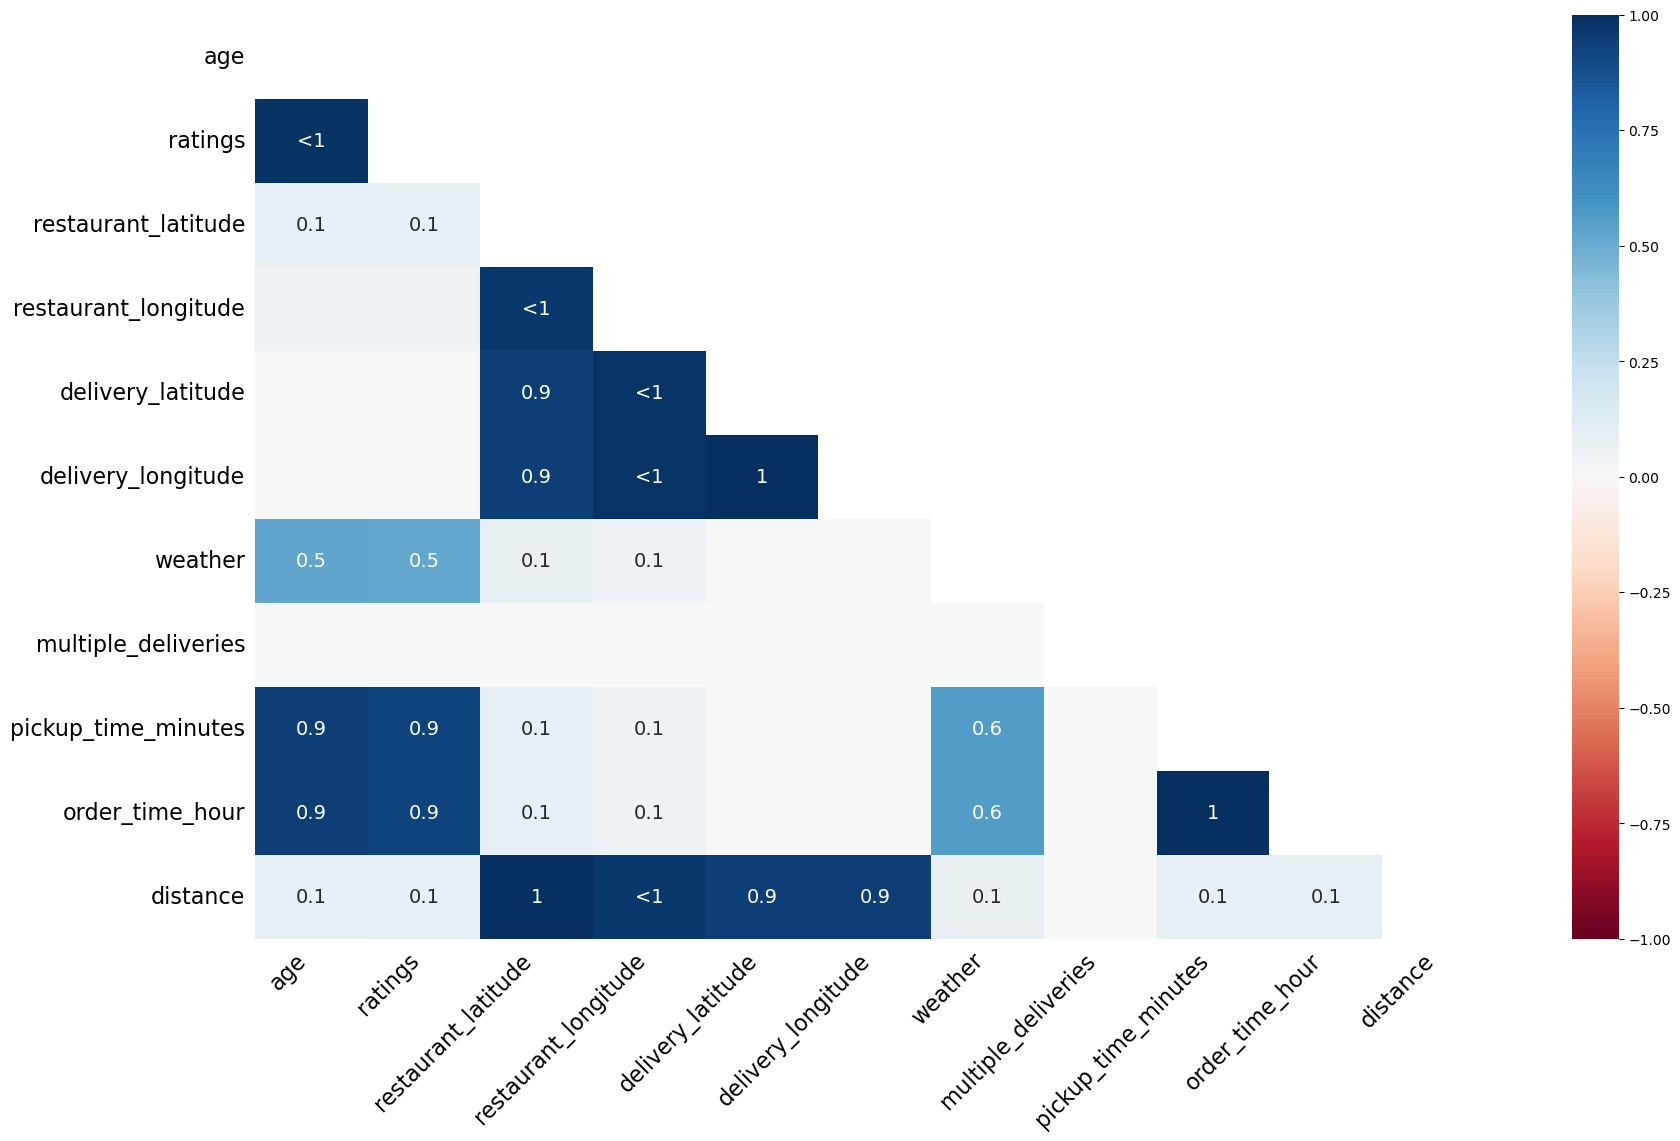

In [141]:
# correlation chart of missing values
msno.heatmap(cleaned_data)

#### **Save Cleaned Data**

In [ ]:
# save the cleaned data. 

cleaned_data.to_csv("../data/cleaned_data.csv", index=False)

In [143]:
# load the cleaned data

cleaned_data_load = pd.read_csv("../data/cleaned_data.csv")

In [144]:
cleaned_data_load

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_delay,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,32,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,36,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,16,CHEN,11,3,friday,0,-1425.0,23.0,night,4.657195
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,26,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393


In [145]:
# data types of cleaned data. 

cleaned_data_load.dtypes

rider_id                 object
age                     float64
ratings                 float64
restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
order_date               object
weather                  object
traffic                  object
vehicle_condition         int64
type_of_order            object
type_of_vehicle          object
multiple_deliveries     float64
festival                 object
city_type                object
time_taken                int64
city_name                object
order_day                 int64
order_month               int64
order_day_of_week        object
is_weekend                int64
pickup_time_minutes     float64
order_time_hour         float64
order_time_of_delay      object
distance                float64
dtype: object